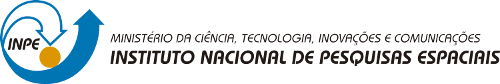

***

<p style="text-align: center;">
Centro de Previsão de Tempo e Estudos Climáticos<br />
Carlos Frederico Bastarz
</p>

***

# Criando um xarray DataSet a partir de dados sintéticos

Este tutorial irá ensinar como criar um Xarray DataSet, que poderá ser utilizado para armazenar informações georeferenciadas. Além da criação do Xarray DataSet, serão mostrados também exemplos simples para a seleção ("slicing") do DataSet e a criação de gráficos espaciais e de linha.

## Importando os módulos principais

No Python os módulos (ou bibliotecas) são pacotes que permitem executar determinadas tarefas. Se você está habituado com o Matlab, entenda os módulos do Python com as "toolboxes" do Matlab.

O "numpy" é provavelmente o módulo mais popular. Ele fornece funções básicas e avançadas para álgebra linear e diversos tipos de cálculos com arrays de n dimensões. Para importá-lo, basta digitar o comando abaixo. Observe que ao longo do script, utilizaremos o mnemônico "np" para chamar as funções relacionadas ao numpy.

In [1]:
import numpy as np

O "pandas" é um módulo bastante popular cuja função principal é facilitar o trabalho com dados tabulados. Além disso, ele também possui características interessantes que permitem a criação de séries numéricas e de dados temporais. O mnemônico utilizado ao longo deste script é o "pd".

In [2]:
import pandas as pd

O "xarray" é um módulo que basicamente expande as funcionalidades do pandas para arrays de n dimensões. A sua principal característica é permitir a georeferenciação dos arrays, e ele é o módulo principal utilizado neste script. O seu mnemônico é o "xr".

In [3]:
import xarray as xr

Para visualizar os arrays criados, iremos utilizar o módulo "matplotlib". Observe que estamos utilizando a função "pyplot" e criando o mnemônico "plt" para a sua utilização.

In [4]:
from matplotlib import pyplot as plt

## Criando as coordenadas temporal e espacial

### Latitudes
Para criar um Xarray DataSet, ou seja, um conjunto de dados que tenha referências geográficas, criaremos primeiro uma grade discretizada em pontos de latitude e longitude. Para criar um array com valores de latitude, iremos utilizar a função "linspace" do módulo numpy. Neste exemplo, criaremos 32 pontos de latitude, dentro do intervalo [-90,90].

In [5]:
lats = np.linspace(-90,90,32)

Para visualizar o array criado, você pode utilizar o comando "print()" ou pode simplesmente digitar "lats".

In [6]:
print("lats:\n",lats)

lats:
 [-90.         -84.19354839 -78.38709677 -72.58064516 -66.77419355
 -60.96774194 -55.16129032 -49.35483871 -43.5483871  -37.74193548
 -31.93548387 -26.12903226 -20.32258065 -14.51612903  -8.70967742
  -2.90322581   2.90322581   8.70967742  14.51612903  20.32258065
  26.12903226  31.93548387  37.74193548  43.5483871   49.35483871
  55.16129032  60.96774194  66.77419355  72.58064516  78.38709677
  84.19354839  90.        ]


### Longitudes
Criaremos os pontos de longitude da nossa grade da mesma forma, utilizando a função "linspace" do módulo numpy. Neste exemplo, criaremos um array de 64 pontos de longitude, dentro do intervalo [0,360].

In [7]:
lons = np.linspace(-180,180,64)

Imprima os valores do array "lats" utilizando o comando "print(lons)" ou simplesmente "lons" no prompt abaixo.

In [8]:
print("lons:\n",lons)

lons:
 [-180.         -174.28571429 -168.57142857 -162.85714286 -157.14285714
 -151.42857143 -145.71428571 -140.         -134.28571429 -128.57142857
 -122.85714286 -117.14285714 -111.42857143 -105.71428571 -100.
  -94.28571429  -88.57142857  -82.85714286  -77.14285714  -71.42857143
  -65.71428571  -60.          -54.28571429  -48.57142857  -42.85714286
  -37.14285714  -31.42857143  -25.71428571  -20.          -14.28571429
   -8.57142857   -2.85714286    2.85714286    8.57142857   14.28571429
   20.           25.71428571   31.42857143   37.14285714   42.85714286
   48.57142857   54.28571429   60.           65.71428571   71.42857143
   77.14285714   82.85714286   88.57142857   94.28571429  100.
  105.71428571  111.42857143  117.14285714  122.85714286  128.57142857
  134.28571429  140.          145.71428571  151.42857143  157.14285714
  162.85714286  168.57142857  174.28571429  180.        ]


### Tempos
Além das coordenadas geográficas de latitude e longitude, criaremos também um array que conterá alguns timesteps que irão caracterizar o Xarray DataSet que estamos criando. Para isso, podemos utilizar a função "date_range" do pandas. Criaremos 4 timesteps a partir da data "2014-11-01", ou seja, a partir de 1 de novembro de 2014.

In [9]:
times = pd.date_range("2014-11-01",periods=4)

Imprime os valores do array "times" criado com o comando "print" no prompt abaixo.

In [10]:
print("times:\n",times)

times:
 DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04'], dtype='datetime64[ns]', freq='D')


## Criando um array de dados sintéticos
Até aqui o que fizemos foi apenas criar arrays que serão utilizados para criar o nosso Xarray DataSet. No entanto, ainda é necessário criar valores que representarão a informação geoespacial que queremos representar. Para isso, podemos utilizar a função "random.randn" do módulo numpy. Esta função gera um array de valores aleatórios e com a dimensão que quisermos. No entanto, para tonar o problema um pouco mais realista, criaremos uma função de duas variáveis que representará uma superfície, de forma que tenhamos valores que seguem a função "seno". Como temos três coordenadas (latitude, longitude e tempo), iremos criar um array com 3 dimensões. Observe que "Z" irá representar a superfície criada e que utilizaremos esta informação para adiconarmos valores aleatórios que serão utilzados para a composição da dimensão temporal. Ao final, somaremos o valor "30" para alcançar valores que sejam representativos da temperatura do ar em graus Celsius.

In [11]:
def f(x, y):
    return (np.sin(x) + 2*np.sin(y))

x = lats
y = lons

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [12]:
temp = Z + np.random.randn(len(times),len(lons),len(lats)) + 30

Imprima os valores do array "temp" e inspecione os valores criados.

In [13]:
print("temp:\n",temp)

temp:
 [[[29.36160124 31.81087693 30.53387921 ... 32.12414865 32.0225615
   31.93992604]
  [31.58611613 30.11980626 32.4952703  ... 32.62042156 31.35816282
   30.03570489]
  [31.20897746 29.81723919 31.63479048 ... 32.26758617 32.08891544
   31.51092322]
  ...
  [28.56701769 29.35947578 27.56027169 ... 28.35209272 28.56062847
   30.27191612]
  [26.04384583 28.10442212 27.18760759 ... 27.81869635 26.91581509
   28.27350614]
  [29.47746473 27.87544771 26.78569599 ... 27.28085473 28.53458327
   29.3094961 ]]

 [[29.45218958 31.24331607 32.77268833 ... 30.79864521 30.99299213
   31.77144013]
  [31.9389994  31.81169233 31.67948097 ... 31.42056327 34.30394024
   31.98507585]
  [31.37088998 30.16665615 32.94775783 ... 33.61904971 32.73391871
   32.235865  ]
  ...
  [28.93741947 27.17538287 27.55031052 ... 27.26785224 26.64162102
   29.05761379]
  [28.40043887 28.38581085 28.5323956  ... 30.73625317 30.05645112
   29.60476535]
  [28.13012507 26.90915872 28.07775424 ... 28.32323347 29.80728642


Para verificar o tamanho do array que criamos, utilize o método "shape":

In [14]:
temp.shape

(4, 64, 32)

Ou seja, temos o array "temp" possui 3 dimensões, sendo a primeira o tempo (4 tempos), a segunda são as longitudes (64 valores) e a última, as latitudes (32 valores).

### Criando o Dataset

Com todas as coordenadas criadas e com o array de dados já determinado, podemos inicializar o Xarray Dataset. Para isso, utilizamos a função "DataSet" do xarray:

In [15]:
ds = xr.Dataset()

Digite "ds" para verificar a estrutura básica do Xarray DataSet criado.

In [16]:
ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

Observe que o Xarray DataSet não possui nenhum array associado e nenhuma dimensão. Vamos adicionar os arrays criados a este Xarray DataSet. Adicionando a variável "temp" ao Dataset, observe que a ordem das dimensões deve ser a mesma que indexa o array "temp":

In [17]:
ds["temp"] = (("time","lon","lat"),temp)

Verifique novamente a estrutura do Xarray DataSet "ds":

In [18]:
ds

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 4)
Dimensions without coordinates: lat, lon, time
Data variables:
    temp     (time, lon, lat) float64 29.36 31.81 30.53 ... 28.3 29.47 29.56

Observe que agora o Xarray DataSet possui as dimensões "lat", "lon" e "time" e que "temp" é reconhecido como uma variável. Apesar disso, as dimensões citadas ainda não possuem coordenadas. Xarrays possuem coordenadas e dimensões. A diferença entre estas duas estruturas é que a primeira representa os valores e a segunda, o tamanho. Logo, quando definimos que o array "lats" possui 32 valores, acabamos por definir que a sua dimensão é 32, e os valores contidos no array representam as coordenadas. Mas observe que as coordenadas devem ser utilizadas para indexar um array que representa uma ou mais variáveis, sendo esta "temp" neste exemplo. Para adicionar as coordenadas espaciais, basta utilizar o método "coords":

In [19]:
ds.coords["lat"] = ("lat",lats)

Verifique novamente a estrutura do Xarray DataSet "ds":

In [20]:
ds

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat      (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 72.58 78.39 84.19 90.0
Dimensions without coordinates: lon, time
Data variables:
    temp     (time, lon, lat) float64 29.36 31.81 30.53 ... 28.3 29.47 29.56

Observe que agora o array "lat" aparece como uma coordenada, que representa os 320 valores do array "lats". Vamos adicionar agora as coordenadas do array "lons":

In [21]:
ds.coords["lon"] = ("lon",lons)

In [22]:
ds

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat      (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 72.58 78.39 84.19 90.0
  * lon      (lon) float64 -180.0 -174.3 -168.6 -162.9 ... 168.6 174.3 180.0
Dimensions without coordinates: time
Data variables:
    temp     (time, lon, lat) float64 29.36 31.81 30.53 ... 28.3 29.47 29.56

Adicionando a coordenada temporal:

In [23]:
ds.coords["time"] = times

In [24]:
ds

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat      (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 72.58 78.39 84.19 90.0
  * lon      (lon) float64 -180.0 -174.3 -168.6 -162.9 ... 168.6 174.3 180.0
  * time     (time) datetime64[ns] 2014-11-01 2014-11-02 2014-11-03 2014-11-04
Data variables:
    temp     (time, lon, lat) float64 29.36 31.81 30.53 ... 28.3 29.47 29.56

Adicionadas as coordenadas de latitude, longitude e tempo, Podemos dar um passo adiante e criar uma nova coordenada que fará alusão à data da condição inicial. Observe que das datas que foram criadas na coordenada "time" (associada à dimensão "times"), estas fazem alusão aos tempos de previsão. Para Adicionando um tempo de referência, utilizamos também o método "coords" e a função "Timestamp" do Pandas para criar uma data:

In [25]:
ds.coords["analysis_time"] = pd.Timestamp("2014-10-31")

In [26]:
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 78.39 84.19 90.0
  * lon            (lon) float64 -180.0 -174.3 -168.6 ... 168.6 174.3 180.0
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31
Data variables:
    temp           (time, lon, lat) float64 29.36 31.81 30.53 ... 29.47 29.56

Observe que as coordenadas "time" e "reference_time" possuem objetos do tipo "datetime". Este é um detalhe importante, pois os softwares que lêem arquivos NetCDF conseguirão interpretar estas informações como informações temporais.

Para tornar o nosso Xarray DataSet mais completo, podemos incluir metadados que irão descrever os diferentes atributos do DataSet. Para incluir informações de metadados, podemos utilizar o método "attrs" do Xarray:

In [27]:
ds.attrs["title"] = "Absolute Temperature"

In [28]:
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 78.39 84.19 90.0
  * lon            (lon) float64 -180.0 -174.3 -168.6 ... 168.6 174.3 180.0
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31
Data variables:
    temp           (time, lon, lat) float64 29.36 31.81 30.53 ... 29.47 29.56
Attributes:
    title:    Absolute Temperature

Observe que uma nova seção "Attributes" foi adicionada à estrutura do Xarray DataSet criado, com um rótulo "title" e uma string associada "Absolute Temperature". Agora, como já adicionamos o nome da variável que buscamos representar, vamos adicionar um novo metadado, que irá representar a unidade em que os dados estão sendo representados:

In [29]:
ds.attrs["unit"] = "Degrees Celsius"

In [30]:
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 78.39 84.19 90.0
  * lon            (lon) float64 -180.0 -174.3 -168.6 ... 168.6 174.3 180.0
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31
Data variables:
    temp           (time, lon, lat) float64 29.36 31.81 30.53 ... 29.47 29.56
Attributes:
    title:    Absolute Temperature
    unit:     Degrees Celsius

Observe que os novos metadados são acrescentados à lista de atributos do Xarray DataSet. Um outro metadado que podemos acrescentar, é a resolução da grade que estamos representando. Considerando que a grade que estamos representado é uma grade regular retangular, podemos utilizar a dimensão das longitudes (ou latitudes) para calcular a resolução da grade:

In [31]:
ds.attrs["resolution"] = 360 / (len(lons)-1)

In [32]:
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 78.39 84.19 90.0
  * lon            (lon) float64 -180.0 -174.3 -168.6 ... 168.6 174.3 180.0
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31
Data variables:
    temp           (time, lon, lat) float64 29.36 31.81 30.53 ... 29.47 29.56
Attributes:
    title:       Absolute Temperature
    unit:        Degrees Celsius
    resolution:  5.714285714285714

Com isso, finalizamos a construção do Xarray DataSet. Observe que incluímos as dimensões, coordenadas, array e atributos ao DataSet. Na seção a seguir, iremos adicionar uma nova variável.

### Acrescentando uma nova variável (com as mesmas dimensões)
Suponha agora que queiramos acrescentar uma nova variável, que possua as mesas dimensões que a variável "temp". A nova variável, denominada "psnm", possuirá valores semelhantes à pressão em superfície. Para obtermos os valores, faremos um procedimento semelhante ao da variável "temp", sendo que ao final somaremos "1000" para que os valores sejam semelhantes à pressão em superfície:

In [33]:
psnm = Z + np.random.randn(len(times),len(lons),len(lats)) + 1000

In [34]:
print("psnm:\n",psnm)

psnm:
 [[[1001.40479485  999.45723756 1001.58697236 ... 1002.5090074
   1002.70930284 1001.37310349]
  [1002.86870958 1000.36176926 1001.32527741 ... 1002.5842524
   1004.46120801 1003.8044014 ]
  [1001.15170646 1001.53436488 1001.11618902 ... 1002.43837526
   1001.19683195 1002.72956899]
  ...
  [ 998.47888927  998.4273787   997.382031   ...  998.10510562
    999.65600972  999.04754087]
  [ 995.36344845  998.153255    997.38064851 ...  998.36837613
    997.5600836   999.82552092]
  [ 997.07759134  998.35721814  997.10436509 ...  999.42833686
    999.20708413 1000.25324871]]

 [[1000.14141888 1001.02692185  999.533666   ... 1001.96264548
   1003.73344237 1003.54836193]
  [1000.40403065 1001.66024903  999.78556811 ... 1001.60238439
   1002.70952974 1001.56937652]
  [1000.51144557  999.13934794 1001.97082251 ... 1001.24775643
   1002.28544909 1001.0983363 ]
  ...
  [ 996.95213276  998.15596954  998.38019536 ...  997.62171794
    997.77598911  999.02426659]
  [ 998.09280196  997.68393486 

Para adicionar a variável "psnm" ao Xarray DataSet "ds" criado, basta indicar "psnm" como sendo uma tupla que conterá as mesmas dimensões e coordenadas. Acrescentando a variável "psnm" ao Dataset "ds":

In [35]:
ds["psnm"] = (("time","lon","lat"),psnm)

In [36]:
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 64, time: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 78.39 84.19 90.0
  * lon            (lon) float64 -180.0 -174.3 -168.6 ... 168.6 174.3 180.0
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31
Data variables:
    temp           (time, lon, lat) float64 29.36 31.81 30.53 ... 29.47 29.56
    psnm           (time, lon, lat) float64 1.001e+03 999.5 ... 998.1 998.2
Attributes:
    title:       Absolute Temperature
    unit:        Degrees Celsius
    resolution:  5.714285714285714

## Plotando a grade criada
Agora que já temos um Xarray DataSet, podemos selecionar a variável que quisermos, para uma determinado tempo de previsão, ou ainda para uma região dentro do domínio e plotar o resultado.

Primeiro, vamos selecionar a variável "temp", que representa a temperatura do ar, e vamos também selecionar o primeiro tempo de previsão. Para isso, indicamos a variável "temp" e utilizamos o método "isel" do Xarray, indicando o tempo. O método "isel" indica que podemos fazer seleções utilizando números inteiros, ou seja, quando fazemos "isel(time=0)", estamos selecionando o primeiro valor da coordenada "time":

In [37]:
temp_t0=ds["temp"].isel(time=0)

In [38]:
temp_t0

<xarray.DataArray 'temp' (lon: 64, lat: 32)>
array([[29.36160124, 31.81087693, 30.53387921, ..., 32.12414865,
        32.0225615 , 31.93992604],
       [31.58611613, 30.11980626, 32.4952703 , ..., 32.62042156,
        31.35816282, 30.03570489],
       [31.20897746, 29.81723919, 31.63479048, ..., 32.26758617,
        32.08891544, 31.51092322],
       ...,
       [28.56701769, 29.35947578, 27.56027169, ..., 28.35209272,
        28.56062847, 30.27191612],
       [26.04384583, 28.10442212, 27.18760759, ..., 27.81869635,
        26.91581509, 28.27350614],
       [29.47746473, 27.87544771, 26.78569599, ..., 27.28085473,
        28.53458327, 29.3094961 ]])
Coordinates:
  * lat            (lat) float64 -90.0 -84.19 -78.39 -72.58 ... 78.39 84.19 90.0
  * lon            (lon) float64 -180.0 -174.3 -168.6 ... 168.6 174.3 180.0
    time           datetime64[ns] 2014-11-01
    analysis_time  datetime64[ns] 2014-10-31

Para plotar, basta utilizar o método "plot()":

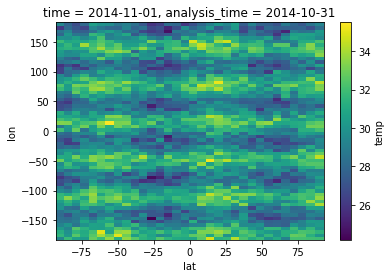

In [39]:
temp_t0.plot()

Na figura acima, observe que as coordenadas "lat" e "lon" estão trocadas. Queremos um gráfico que represente as latitudes no eixo y e as longitudes no eixo x. Para fazer isso, utilizamos o método "transpose" do Xarray:

In [40]:
temp_t0_transp = temp_t0.transpose("lat","lon")

Para plotar, basta utilizar o método "plot()":

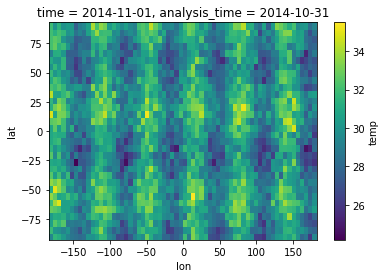

In [41]:
temp_t0_transp.plot()

Observe na figura que os metadatas que adicionamos como atributos foram todos utiizados automaticamente como nomes dos eixos, título e legenda.

## Plotando gráficos de linhas
Utilizando o método "isel" do Xarray, é possível selecionar pontos de latitude e longitude e plotar uma série temporal. Veja o exemplo a seguir:

In [42]:
temp_latlon = ds["temp"].isel(lat=0,lon=0)

In [43]:
temp_latlon

<xarray.DataArray 'temp' (time: 4)>
array([29.36160124, 29.45218958, 29.41051343, 30.77282101])
Coordinates:
    lat            float64 -90.0
    lon            float64 -180.0
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31

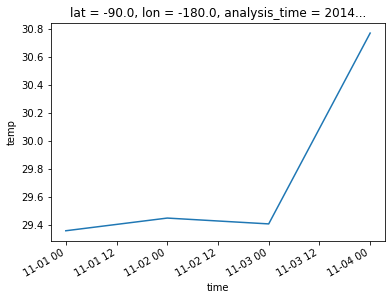

In [44]:
temp_latlon.plot()

Além do método "isel", é possível utiizar também o método "mean", para médias espaciais. Por exemplo, calculando-se médias ao longo das coordenadas "lat" e "lon":

In [45]:
temp_latlon_mean = ds["temp"].mean(dim=["lat","lon"])

In [46]:
temp_latlon_mean

<xarray.DataArray 'temp' (time: 4)>
array([29.97132095, 30.02114588, 30.01002277, 29.9734105 ])
Coordinates:
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    analysis_time  datetime64[ns] 2014-10-31

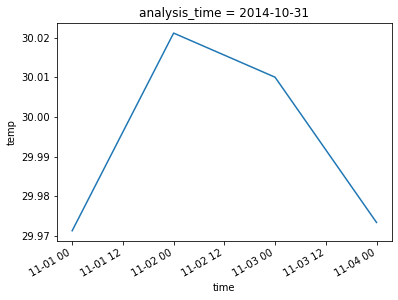

In [47]:
temp_latlon_mean.plot()

## Salvando o Xarray DataSet em um arquivo NetCDF
Uma vantagem que o Xarray possui é salvar o DataSet em um arquivo NetCDF. Para fazer isso, basta utilizar a função "to_netcdf" do Xarray:

In [48]:
ds.to_netcdf("ds.nc")

Podemos também salvar em um arquivo NetCDF apenas a variável "test", que contém um subset do Xarray DataSet "ds". Para fazer isso, procedemos da mesma forma:

In [49]:
temp_latlon.to_netcdf("temp.nc")

Caso você queira abrir o arquivo NetCDF gravado em disco, você pode utilizar a função "open_dataset" do Xarray:

In [50]:
ds_temp = xr.open_dataset("temp.nc")

Dessa forma criamos o Xarray DataSet "ds_test" que contém a informação do arquivo "test.nc". Compare a estutura deste Xarray DataSet com a estrutura do Xarray DataSet "test":

In [51]:
ds_temp

<xarray.Dataset>
Dimensions:        (time: 4)
Coordinates:
  * time           (time) datetime64[ns] 2014-11-01 2014-11-02 ... 2014-11-04
    lat            float64 ...
    lon            float64 ...
    analysis_time  datetime64[ns] ...
Data variables:
    temp           (time) float64 ...